<a href="https://colab.research.google.com/github/JieShenAI/pytorch_tutorial/blob/main/lesson19-%E6%84%9F%E7%9F%A5%E6%9C%BA%E7%9A%84%E6%A2%AF%E5%BA%A6%E6%8E%A8%E5%AF%BC/%E6%84%9F%E7%9F%A5%E6%9C%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 单层感知机

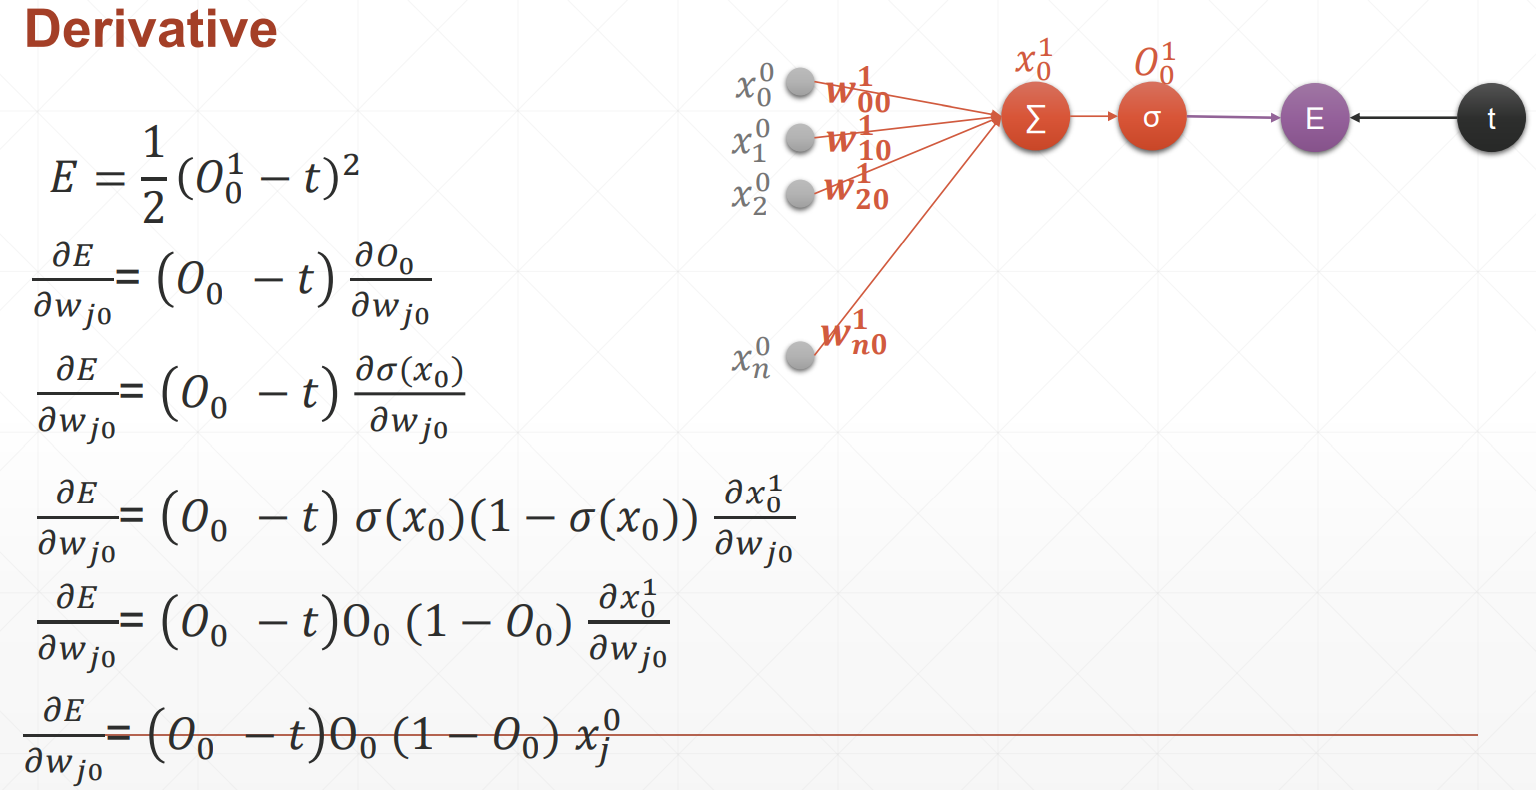

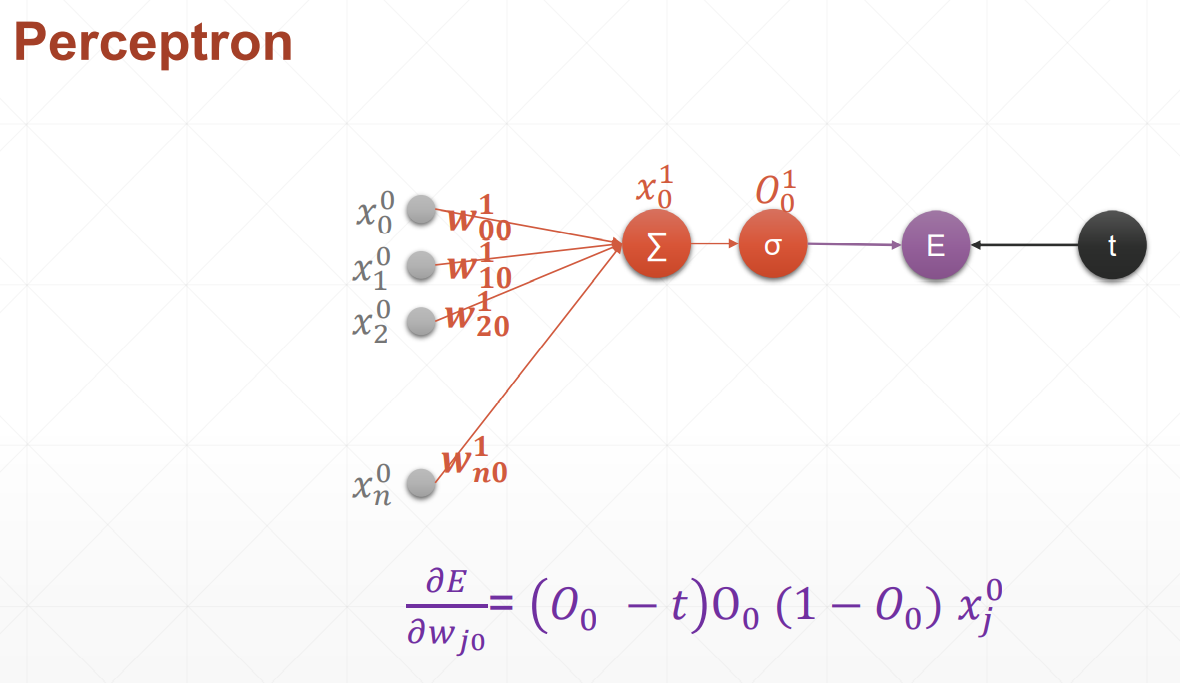![image.png](attachment:image.png)

In [ ]:
import torch
import torch.nn.functional as F

In [ ]:
x = torch.randn(1,10)

In [ ]:
x

tensor([[ 1.2504, -1.2728, -0.1273,  0.7901, -0.4145, -0.0803,  1.1442, -0.8703,
         -0.7754,  0.0040]])

In [ ]:
w = torch.randn(10,1,requires_grad=True)
w

tensor([[-0.0752],
        [-0.1887],
        [-0.9692],
        [ 2.2053],
        [-0.2326],
        [ 0.9368],
        [-2.3673],
        [ 0.5313],
        [ 1.1613],
        [-0.3128]], requires_grad=True)

In [ ]:
o = torch.sigmoid(x@w)
o,o.shape

(tensor([[0.1151]], grad_fn=<SigmoidBackward>), torch.Size([1, 1]))

In [ ]:
loss = F.mse_loss(torch.ones(1,1),o)

In [ ]:
loss

tensor(0.7830, grad_fn=<MseLossBackward>)

In [ ]:
loss.backward()

In [ ]:
w.grad

tensor([[-0.2254],
        [ 0.2295],
        [ 0.0230],
        [-0.1425],
        [ 0.0747],
        [ 0.0145],
        [-0.2063],
        [ 0.1569],
        [ 0.1398],
        [-0.0007]])

验证公式是否与程序结果一致

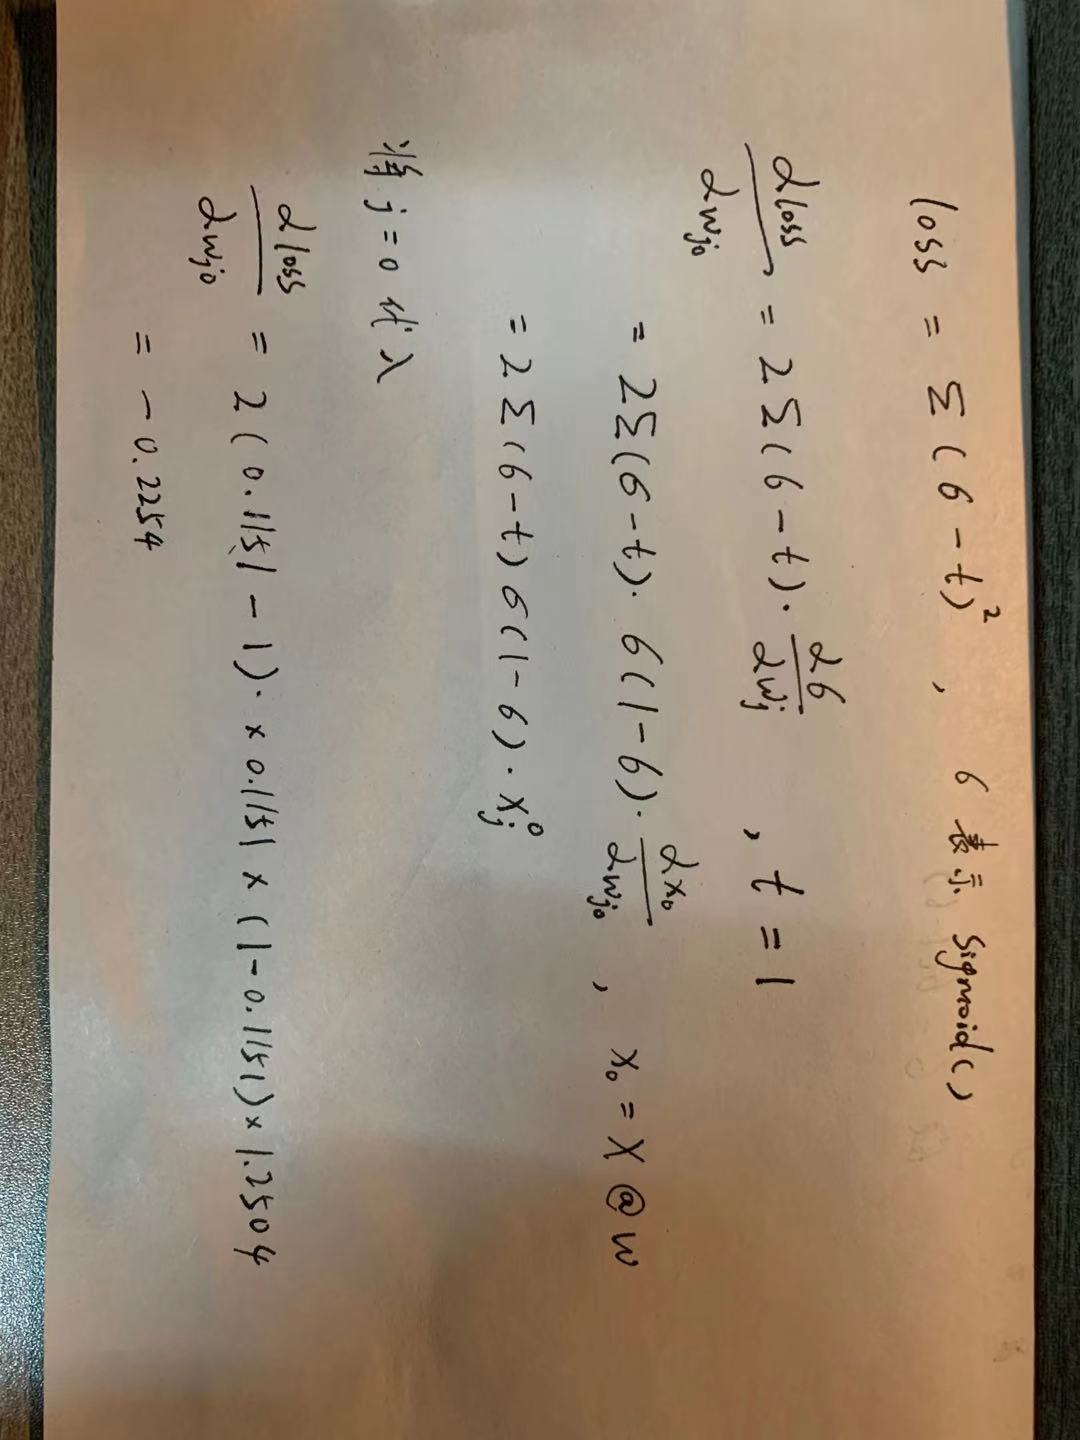

In [ ]:
a = 0.1151

In [ ]:
2*(a-1)*a*(1-a)*1.2504

-0.2253941679382608

In [ ]:
w.grad[0]

tensor([-0.2254])

可以看出公式与程序算出的结果是一致的

# 多层感知机

若对w<sub>jk</sub>求导时，mse的结果中其他的维度不会受到w<sub>jk</sub>的影响，直接忽略掉即可。可以发现，多层感知机的公式，和单层感知机的公式是一样的

In [1]:
import torch
import torch.nn.functional as F

In [2]:
x = torch.randn(1,10)
w = torch.randn(2,10,requires_grad=True)
o = torch.sigmoid(x@w.t())

In [3]:
x

tensor([[ 0.4727,  0.0779, -0.0836, -0.0768, -0.9658,  0.2448,  1.2482, -0.7710,
         -1.0885,  1.1344]])

In [4]:
w

tensor([[-0.1304,  0.5077, -0.7633,  0.0840,  0.2006,  0.0915, -1.3741,  0.9876,
          1.2497,  0.0103],
        [ 0.1438, -1.5241, -0.6685, -0.5639,  0.2666,  0.0612,  2.7698, -0.0113,
          1.2410,  1.7448]], requires_grad=True)

In [5]:
o

tensor([[0.0187, 0.9802]], grad_fn=<SigmoidBackward>)

利用了广播的特点

In [7]:
loss = F.mse_loss(torch.ones(1,1),o)
loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  """Entry point for launching an IPython kernel.


tensor(0.4817, grad_fn=<MseLossBackward>)

In [8]:
F.mse_loss(torch.ones(1,2),o)

tensor(0.4817, grad_fn=<MseLossBackward>)

In [10]:
loss.backward()

In [11]:
w.grad

tensor([[-8.5046e-03, -1.4009e-03,  1.5050e-03,  1.3822e-03,  1.7377e-02,
         -4.4048e-03, -2.2458e-02,  1.3871e-02,  1.9584e-02, -2.0410e-02],
        [-1.8214e-04, -3.0004e-05,  3.2232e-05,  2.9603e-05,  3.7217e-04,
         -9.4338e-05, -4.8099e-04,  2.9707e-04,  4.1944e-04, -4.3713e-04]])

In [12]:
a = 0.0187

In [13]:
2*(a-1)*a*(1-a)*0.4727

-0.0170239683105162

In [14]:
-0.0170239683105162/2

-0.0085119841552581

再来算一个

In [15]:
(a-1)*a*(1-a)*0.0779

-0.0014027577019137

为何这个多层不需要乘2，上面单层的乘2了